<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Aplicaciones del Procesamiento de Lenguaje Natural</center></span>

<center>Prática III FastText pre-entrenado</center>
<br></br>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Referencias</span>

1. [Aprendizaje Profundo-Diplomado](https://github.com/AprendizajeProfundo/Diplomado)
1. [Aprendizaje Profundo-PLN](https://github.com/AprendizajeProfundo/PLN)
1. Varios, [Dive into deep learning](https://d2l.ai/), enero 2021

## <span style="color:blue">Contenido</span>

## <span style="color:blue">Obtención de Datos</span>

In [1]:
import pandas as pd
datos = pd.read_pickle('../Datos/Ensayos/data2bert.pkl')

### Escala target dentro dentro de cada tópico

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

minimum_scores = [-1, 2, 1, 0, 0, 0, 0, 0, 0] 
maximum_scores = [-1, 12, 6, 3, 3, 4, 4, 30, 60]

#scores = datos[['topic', 'target_score']].reset_index() 

# Rescala target_score en  rango 0 - 1:
#scaler = MinMaxScaler((0.0,1.0))

#scaled = []
#for topic in range(1,9):
#    topic_scores = scores[scores['topic'] == topic]['target_score'].to_frame()
#    s = np.round((scaler.fit_transform(topic_scores).reshape(-1)),3)
#    scaled = np.append(scaled, s)

# sube al dataframe datos

datos['standard_score'] = np.tanh(datos['target_score'])
datos['standard_score_2'] = 1/(1+(np.exp((-datos['target_score']))))
#datos

In [16]:
datos.columns

Index(['essay_id', 'topic', 'essay_text', 'target_score', 'tokens',
       'corrections', 'similarity', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj',
       'standard_score'],
      dtype='object')

In [22]:

# selcciona variables

var_names = ['target_score', 'standard_score', 'standard_score_2',
        'corrections', 'similarity', 'token_count',
       'unique_token_count', 'nostop_count', 'sent_count',
       'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent',
       'noun', 'adj', 'pron', 'verb', 'cconj', 'adv',
       'det', 'propn', 'num', 'part', 'intj']

variable = datos[var_names]
    

In [23]:
variable.shape

(12978, 33)

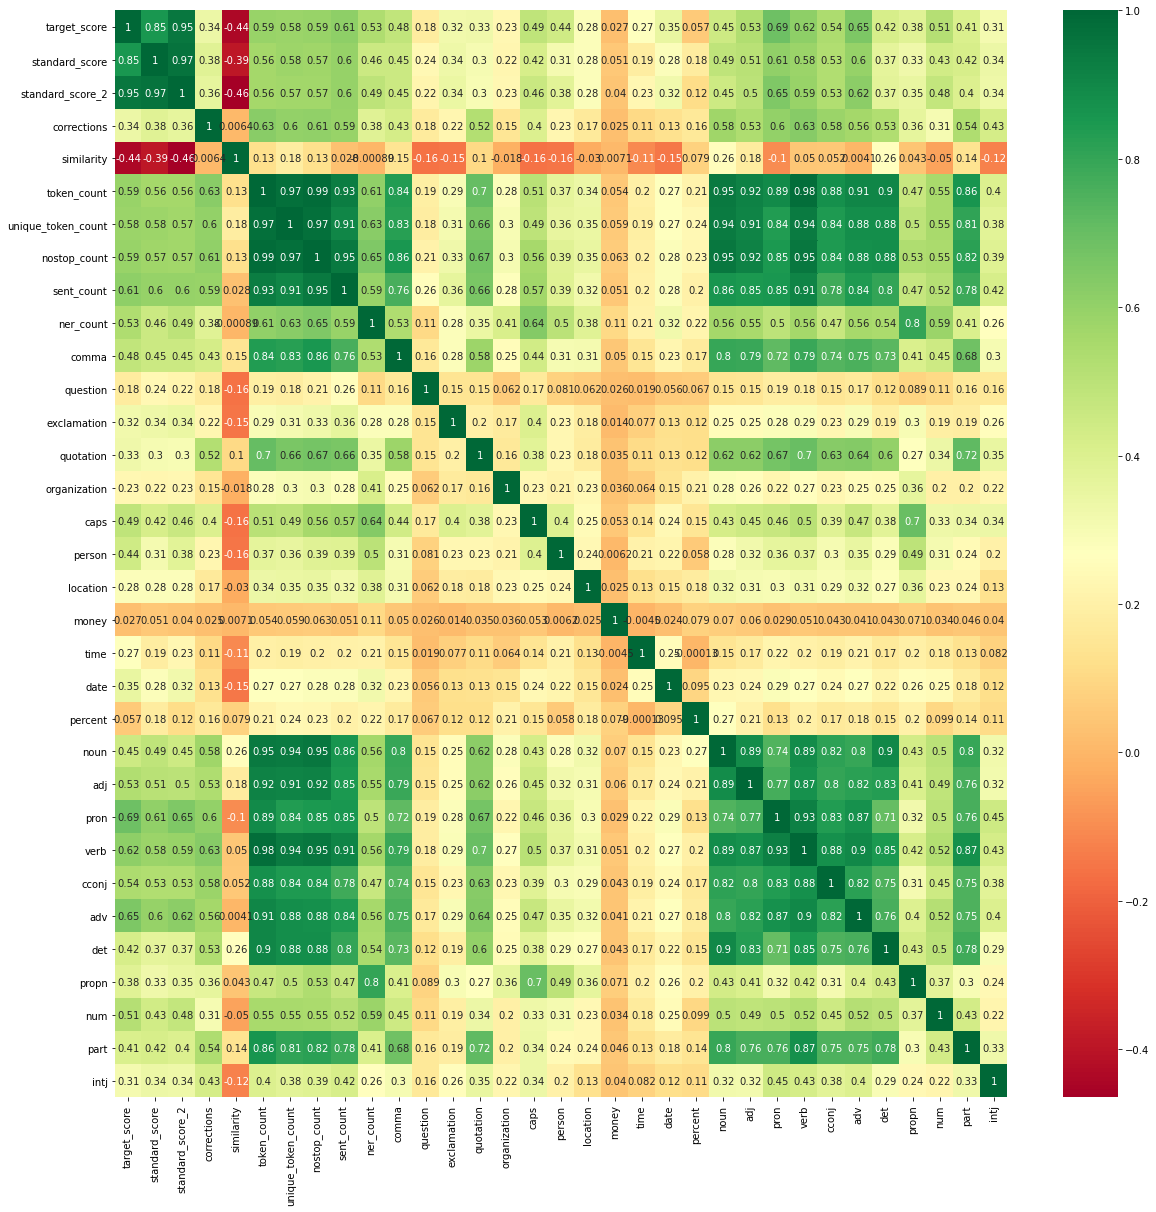

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = variable.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(variable[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
pd.options.display.max_rows = 100
corrmat[['target_score','standard_score','standard_score_2']].sort_values(by='target_score',ascending=False)

,target_score,standard_score,standard_score_2
target_score,1.000000,0.852357,0.952020
standard_score_2,0.952020,0.965662,1.000000
standard_score,0.852357,1.000000,0.965662
pron,0.688836,0.610891,0.649154
adv,0.651870,0.597378,0.619486
verb,0.615194,0.583446,0.590587
sent_count,0.612585,0.596209,0.598289
nostop_count,0.591806,0.572282,0.568472
token_count,0.588550,0.562913,0.561947
unique_token_count,0.583458,0.578753,0.566687


### Estadisticas para seleccionar features

In [32]:
features = datos.select_dtypes(include='number').iloc[:,2:]

predictors = features.select_dtypes(include='number').iloc[:,2:-2]
target = features.select_dtypes(include='number').iloc[:,-1]

In [37]:
predictors

,similarity,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,quotation,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,0.973035,395,180,206,16,2,18,3,4,7,...,19,48,56,14,19,20,6,0,16,2
1,0.979935,456,210,238,21,12,15,3,1,3,...,23,42,73,19,26,37,5,5,10,0
2,0.989641,306,160,155,16,5,13,0,0,4,...,18,22,47,16,14,28,3,3,10,1
3,0.981397,576,266,330,31,14,14,1,2,3,...,40,28,81,17,28,45,37,0,23,0
4,0.978967,518,213,252,30,7,15,0,0,6,...,28,34,73,16,39,57,4,4,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.954823,953,349,450,39,26,61,0,0,18,...,56,135,142,55,74,69,17,14,24,3
12974,0.955488,635,226,314,43,19,24,10,0,9,...,37,76,79,25,58,53,18,4,17,3
12975,0.959167,955,380,513,48,35,48,7,9,8,...,41,85,126,39,58,96,38,5,21,2
12976,0.942394,666,258,355,40,20,41,2,0,15,...,43,95,79,22,59,50,13,4,10,1


### Infromación mutua

In [40]:
from sklearn.feature_selection import  SelectKBest, f_regression, mutual_info_regression

X = predictors
y = target
best_features= SelectKBest(score_func=mutual_info_regression,k=predictors.shape[1])
fit=best_features.fit(X,y)

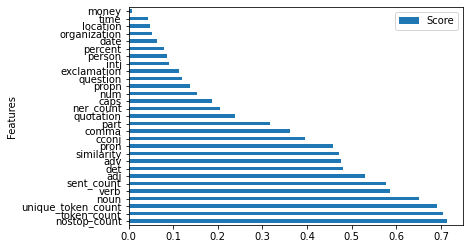

In [41]:
df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(len(predictors),'Score').plot(kind='barh')
plt.show()

### Regresión

In [42]:
best_features= SelectKBest(score_func=f_regression,k=predictors.shape[1])
fit=best_features.fit(X,y)

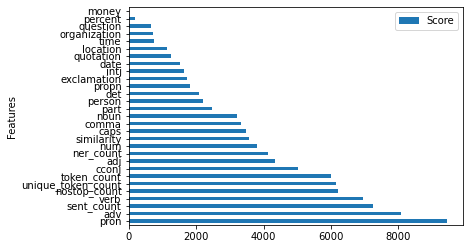

In [43]:
df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(len(predictors),'Score').plot(kind='barh')
plt.show()

#### Guarda los textos de los ensayos corregido para el embedding

In [43]:
datos['essay_text'].to_csv('../Datos/Ensayos/ensayos.csv')

[[Volver]](#Contenido)

## Aprendizaje Supervisado 

### Sumergimiento de los textos por palabra

### Crea el modelo de sumergimiento

In [47]:
# fasttext para cargar  Embeddings
import fasttext

pretrained_vectors = '../Datos/fasttext/crawl-300d-2M-subword/crawl-300d-2M-subword.vec'

ft_model = fasttext.train_supervised('../Datos/Ensayos/ensayos.csv',dim=300, 
                                     pretrainedVectors=pretrained_vectors)

##  Embedding de Palabras

In [48]:
import numpy as np

In [49]:
no_doc = np.random.randint(len(datos))

In [50]:
# Volcabulario del embedding
vocabulary = set(ft_model.words)

def doc_word_vectors(words, model, vocabulary, num_features):
    
    nwords = 0.
    no_found=[]
    doc=[]
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            doc.append(model.get_word_vector(word))
        else:
            no_found.append(word)
    
    
        
    return np.array(doc),no_found

emb0,no_found = doc_word_vectors(datos['tokens'].iloc[no_doc], model=ft_model, vocabulary=vocabulary, num_features=ft_model.dim)

print('Dimensión del Embedding:',emb0.shape)
print('\nPalabras no encontradas:\n\n',no_found)

Dimensión del Embedding: (79, 300)

Palabras no encontradas:

 ['obsticles', 'padestrans']


## Embedding de Textos

### Promediar Palabras para Perfilar Ensayos 

In [51]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.get_word_vector(word))
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.words)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
ftext_feature_array = averaged_word_vectorizer(corpus=datos['tokens'], model=ft_model, num_features=ft_model.dim)

In [52]:
doc_embedding = pd.DataFrame(ftext_feature_array)
doc_embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.008499,-0.038237,0.105210,0.013788,0.001453,-0.018744,0.117734,-0.004281,0.003158,0.031706,...,-0.006155,0.000903,-0.009501,-0.000887,0.003693,0.053312,-0.028397,-0.020829,-0.005088,0.001661
1,0.007150,-0.034964,0.093175,0.011602,-0.011167,-0.016687,0.129056,-0.000298,0.007098,0.027275,...,-0.002393,-0.001828,-0.007920,0.002031,0.005523,0.059389,-0.020708,-0.015579,-0.007987,-0.005219
2,0.006043,-0.035632,0.112388,0.009438,-0.006212,-0.023404,0.124422,-0.002761,0.007348,0.020609,...,-0.005260,-0.004330,-0.014461,0.002288,0.002941,0.065504,-0.028705,-0.017121,-0.013377,-0.005048
3,-0.003015,-0.019900,0.092163,0.008884,-0.010231,-0.018524,0.109975,-0.003709,-0.008661,0.010592,...,-0.007687,-0.003023,-0.016876,0.000143,-0.001334,0.048174,-0.027891,-0.011030,-0.017361,-0.000691
4,0.004319,-0.023032,0.095361,0.003775,-0.013867,-0.017180,0.123681,-0.006944,-0.005880,0.022862,...,-0.004212,-0.003895,0.011944,0.004437,0.000127,0.066843,-0.025993,-0.013464,-0.008589,-0.003013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,-0.001032,-0.025872,0.085531,0.001768,-0.011100,-0.026433,0.119126,-0.012377,-0.007437,0.022022,...,0.002389,-0.000543,0.035358,0.002448,-0.001074,0.047983,-0.013424,-0.020890,-0.007257,-0.008405
12974,-0.006235,-0.013767,0.092439,0.004624,-0.009241,-0.008504,0.104759,-0.008123,-0.013472,0.018357,...,-0.006539,-0.003272,0.029001,-0.005353,0.003275,0.058005,-0.013952,-0.024163,-0.001354,-0.004698
12975,-0.007505,-0.019844,0.082742,0.006505,-0.002189,-0.004130,0.095823,-0.006166,-0.010590,0.001598,...,-0.006703,-0.002499,0.012883,-0.001341,-0.000136,0.049069,-0.019579,-0.020525,-0.007690,-0.007256
12976,-0.003028,-0.013351,0.074470,0.010099,-0.014268,-0.000295,0.087919,-0.003227,-0.009902,0.016176,...,-0.015353,-0.000140,0.029683,0.002929,0.006621,0.055578,-0.019831,-0.019788,-0.004829,-0.005370


In [53]:
doc_embedding.to_csv('../Datos/Ensayos/Doc_Embedding_300_pretrained.csv')

In [ ]:
doc_embedding = pd.read_csv('../Datos/Ensayos/Doc_Embedding_300_pretrained.csv',index_col=0)
doc_embedding

In [3]:
import pandas as pd

In [54]:
embedding = pd.read_csv('../Datos/Ensayos/Doc_Embedding_300_pretrained.csv',index_col=0)
embedding_vector_length = embedding.shape[1]
embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.008499,-0.038237,0.105210,0.013788,0.001453,-0.018744,0.117734,-0.004281,0.003158,0.031706,...,-0.006155,0.000903,-0.009501,-0.000887,0.003693,0.053312,-0.028397,-0.020829,-0.005088,0.001661
1,0.007150,-0.034964,0.093175,0.011602,-0.011167,-0.016687,0.129056,-0.000298,0.007098,0.027275,...,-0.002393,-0.001828,-0.007920,0.002031,0.005523,0.059389,-0.020708,-0.015579,-0.007987,-0.005219
2,0.006043,-0.035632,0.112388,0.009438,-0.006212,-0.023404,0.124422,-0.002761,0.007348,0.020609,...,-0.005260,-0.004330,-0.014461,0.002288,0.002941,0.065504,-0.028705,-0.017121,-0.013377,-0.005048
3,-0.003015,-0.019900,0.092163,0.008884,-0.010231,-0.018524,0.109975,-0.003709,-0.008661,0.010592,...,-0.007687,-0.003023,-0.016876,0.000143,-0.001334,0.048174,-0.027891,-0.011030,-0.017361,-0.000691
4,0.004319,-0.023032,0.095361,0.003775,-0.013867,-0.017180,0.123681,-0.006944,-0.005880,0.022862,...,-0.004212,-0.003895,0.011944,0.004437,0.000127,0.066843,-0.025993,-0.013464,-0.008589,-0.003013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,-0.001032,-0.025872,0.085531,0.001768,-0.011100,-0.026433,0.119126,-0.012377,-0.007437,0.022022,...,0.002389,-0.000543,0.035358,0.002448,-0.001074,0.047983,-0.013424,-0.020890,-0.007257,-0.008405
12974,-0.006235,-0.013767,0.092439,0.004624,-0.009241,-0.008504,0.104759,-0.008123,-0.013472,0.018357,...,-0.006539,-0.003272,0.029001,-0.005353,0.003275,0.058005,-0.013952,-0.024163,-0.001354,-0.004698
12975,-0.007505,-0.019844,0.082742,0.006505,-0.002189,-0.004130,0.095823,-0.006166,-0.010590,0.001598,...,-0.006703,-0.002499,0.012883,-0.001341,-0.000136,0.049069,-0.019579,-0.020525,-0.007690,-0.007256
12976,-0.003028,-0.013351,0.074470,0.010099,-0.014268,-0.000295,0.087919,-0.003227,-0.009902,0.016176,...,-0.015353,-0.000140,0.029683,0.002929,0.006621,0.055578,-0.019831,-0.019788,-0.004829,-0.005370


## Rangos del Embedding 

In [55]:
embedding.min().min()

-0.772525994760716

In [90]:
embedding.max().max()

0.9985762791974204

In [56]:
features = datos.select_dtypes(include='number').iloc[:,2:]
features

,target_score,corrections,similarity,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,...,verb,cconj,adv,det,propn,num,part,intj,standard_score,standard_score_2
0,0.8,15,0.973035,395,180,206,16,2,18,3,...,56,14,19,20,6,0,16,2,0.664037,0.689974
1,0.9,23,0.979935,456,210,238,21,12,15,3,...,73,19,26,37,5,5,10,0,0.716298,0.710950
2,0.7,16,0.989641,306,160,155,16,5,13,0,...,47,16,14,28,3,3,10,1,0.604368,0.668188
3,1.0,32,0.981397,576,266,330,31,14,14,1,...,81,17,28,45,37,0,23,0,0.761594,0.731059
4,0.8,19,0.978967,518,213,252,30,7,15,0,...,73,16,39,57,4,4,18,1,0.664037,0.689974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,3.5,28,0.954823,953,349,450,39,26,61,0,...,142,55,74,69,17,14,24,3,0.998178,0.970688
12974,3.2,47,0.955488,635,226,314,43,19,24,10,...,79,25,58,53,18,4,17,3,0.996682,0.960834
12975,4.0,24,0.959167,955,380,513,48,35,48,7,...,126,39,58,96,38,5,21,2,0.999329,0.982014
12976,4.0,13,0.942394,666,258,355,40,20,41,2,...,79,22,59,50,13,4,10,1,0.999329,0.982014


In [57]:
features.columns

Index(['target_score', 'corrections', 'similarity', 'token_count',
       'unique_token_count', 'nostop_count', 'sent_count', 'ner_count',
       'comma', 'question', 'exclamation', 'quotation', 'organization', 'caps',
       'person', 'location', 'money', 'time', 'date', 'percent', 'noun', 'adj',
       'pron', 'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj',
       'standard_score', 'standard_score_2'],
      dtype='object')

In [58]:
#target = features_st_norm['standard_score']
target = features['standard_score_2']
target

0        0.689974
1        0.710950
2        0.668188
3        0.731059
4        0.689974
           ...   
12973    0.970688
12974    0.960834
12975    0.982014
12976    0.982014
12977    0.982014
Name: standard_score_2, Length: 12978, dtype: float64

In [59]:
features = features.iloc[:,1:-2]
features

,corrections,similarity,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,15,0.973035,395,180,206,16,2,18,3,4,...,19,48,56,14,19,20,6,0,16,2
1,23,0.979935,456,210,238,21,12,15,3,1,...,23,42,73,19,26,37,5,5,10,0
2,16,0.989641,306,160,155,16,5,13,0,0,...,18,22,47,16,14,28,3,3,10,1
3,32,0.981397,576,266,330,31,14,14,1,2,...,40,28,81,17,28,45,37,0,23,0
4,19,0.978967,518,213,252,30,7,15,0,0,...,28,34,73,16,39,57,4,4,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,28,0.954823,953,349,450,39,26,61,0,0,...,56,135,142,55,74,69,17,14,24,3
12974,47,0.955488,635,226,314,43,19,24,10,0,...,37,76,79,25,58,53,18,4,17,3
12975,24,0.959167,955,380,513,48,35,48,7,9,...,41,85,126,39,58,96,38,5,21,2
12976,13,0.942394,666,258,355,40,20,41,2,0,...,43,95,79,22,59,50,13,4,10,1


## Preparación de Datos 

In [60]:
valid = pd.read_excel('../Datos/Ensayos/valid_set.xls')
valid

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN
...,...,...,...,...,...
4213,21933,8,Have you ever noticed that if two little kids...,24933,NaN
4214,21934,8,Laughter @CAPS1 I ...,24934,NaN
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,NaN
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,NaN


In [61]:
test = pd.read_csv('../Datos/Ensayos/test_set.tsv',sep='\t', encoding = "ISO-8859-1")
test

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN
...,...,...,...,...,...
4249,22238,8,Just One @CAPS1 @CAPS2 can bring people togeth...,25238,NaN
4250,22239,8,@CAPS8 Was my first time going to the band ca...,25239,NaN
4251,22240,8,Laughter is one of the most important things i...,25240,NaN
4252,22241,8,A @CAPS1 Of @C...,25241,NaN


## Muestreo Estratificado

In [62]:
datos.columns

Index(['essay_id', 'topic', 'essay_text', 'target_score', 'tokens',
       'corrections', 'similarity', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj',
       'standard_score', 'standard_score_2'],
      dtype='object')

In [63]:
conteo = datos.groupby('topic')[['topic']].count()
conteo

,topic
topic,
1,1783
2,1800
3,1726
4,1772
5,1805
6,1800
7,1569
8,723


In [64]:
# Muestras para validación
muestra = np.round(conteo*0.1,decimals=0).astype(int)
muestra

,topic
topic,
1,178
2,180
3,173
4,177
5,180
6,180
7,157
8,72


In [66]:
# Función de Muestreo Estratificado
def strat(df,label,groups):
    
    strat = pd.DataFrame([])
    
    for i,cat in enumerate(sorted(df[f'{label}'].unique())):
        df_cal = df[df[f'{label}']==cat]
        muestra = df_cal.sample(groups[i],random_state=22)
        strat = pd.concat([strat,muestra])
    return strat

## Datos Test 

In [67]:
data_test = strat(datos,'topic',muestra['topic'].values)
data_test

,essay_id,topic,essay_text,target_score,tokens,corrections,similarity,token_count,unique_token_count,nostop_count,...,verb,cconj,adv,det,propn,num,part,intj,standard_score,standard_score_2
829,832,1,"Dear editor, computers are good for people bec...",0.2,"[Dear, editor, ,, computers, are, good, for, p...",1,0.959819,22,20,12,...,2,2,1,0,0,0,0,0,0.197375,0.549834
1366,1371,1,"Dear Local Newspaper, I feel that negative eff...",1.2,"[Dear, Local, Newspaper, ,, I, feel, that, neg...",31,0.977788,602,264,326,...,79,25,36,44,23,0,11,2,0.833655,0.768525
329,331,1,"Dear @CAPS1, A recent study by scientists show...",1.0,"[Dear, @CAPS1, ,, A, recent, study, by, scient...",8,0.980878,545,252,272,...,83,21,36,44,4,2,18,0,0.761594,0.731059
1278,1283,1,"Dear @CAPS1, In a recent poll it was determine...",1.0,"[Dear, @CAPS1, ,, In, a, recent, poll, it, was...",8,0.985302,401,201,228,...,56,17,22,30,8,1,8,0,0.761594,0.731059
1102,1105,1,"Dear editor, @TIME1 week, I noticed an article...",0.9,"[Dear, editor, ,, @TIME1, week, ,, I, noticed,...",15,0.979755,443,191,248,...,57,16,25,24,6,0,9,0,0.716298,0.710950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,21327,8,I was in @NUM1 grade; when it was almost the ...,3.3,"[ , I, was, in, @NUM1, grade, ;, when, it, wa...",18,0.932475,528,208,204,...,73,27,32,37,4,4,8,5,0.997283,0.964429
12825,21433,8,A @CAPS1 @CAPS2 The @CAPS3 @CAPS4 was a warm ...,3.5,"[ , A, @CAPS1, @CAPS2, The, @CAPS3, @CAPS4, wa...",22,0.948106,864,326,453,...,123,25,65,97,44,5,20,2,0.998178,0.970688
12271,20736,8,“Laughter” A good relationship is built on tr...,4.5,"[ , "", Laughter, "", A, good, rel...",25,0.949564,812,323,420,...,117,28,57,50,22,8,23,2,0.999753,0.989013
12738,21319,8,The snow shimmered in the sunlight like sequi...,4.6,"[ , The, snow, shimmered, in, the, sunlight, l...",11,0.920155,841,376,495,...,118,21,33,85,10,2,16,0,0.999798,0.990048


In [68]:
# Sacar Validation y training
data_train = datos.loc[np.setdiff1d(datos.index,data_test.index)]
data_train

,essay_id,topic,essay_text,target_score,tokens,corrections,similarity,token_count,unique_token_count,nostop_count,...,verb,cconj,adv,det,propn,num,part,intj,standard_score,standard_score_2
0,1,1,"Dear local newspaper, I think effects computer...",0.8,"[Dear, local, newspaper, ,, I, think, effects,...",15,0.973035,395,180,206,...,56,14,19,20,6,0,16,2,0.664037,0.689974
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.9,"[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",23,0.979935,456,210,238,...,73,19,26,37,5,5,10,0,0.716298,0.710950
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.7,"[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",16,0.989641,306,160,155,...,47,16,14,28,3,3,10,1,0.604368,0.668188
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",1.0,"[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",32,0.981397,576,266,330,...,81,17,28,45,37,0,23,0,0.761594,0.731059
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.8,"[Dear, @LOCATION1, ,, I, know, having, compute...",19,0.978967,518,213,252,...,73,16,39,57,4,4,18,1,0.664037,0.689974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3.5,"[ , In, most, stories, mothers, and, daughters...",28,0.954823,953,349,450,...,142,55,74,69,17,14,24,3,0.998178,0.970688
12974,21628,8,I never understood the meaning laughter is th...,3.2,"[ , I, never, understood, the, meaning, laught...",47,0.955488,635,226,314,...,79,25,58,53,18,4,17,3,0.996682,0.960834
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",4.0,"[When, you, laugh, ,, is, @CAPS5, out, of, hab...",24,0.959167,955,380,513,...,126,39,58,96,38,5,21,2,0.999329,0.982014
12976,21630,8,"Tripping' on fences I am @NUM1 years young, a...",4.0,"[ , Trippin, ', ...",13,0.942394,666,258,355,...,79,22,59,50,13,4,10,1,0.999329,0.982014


In [69]:
embedding_train = embedding.iloc[data_train.index]
embedding_test = embedding.iloc[data_test.index]
print(embedding_train.shape)
print(embedding_test.shape)

(11681, 300)
(1297, 300)


In [70]:
features_train = features.iloc[data_train.index]
features_test = features.iloc[data_test.index]
print(features_train.shape)
print(features_test.shape)

(11681, 30)
(1297, 30)


In [71]:
target_train = target.iloc[data_train.index]
target_test = target.iloc[data_test.index]

## Cambio de Escalas

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1.0,1.0))

features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_test_scaled = pd.DataFrame(scaler.fit_transform(features_test))
#target_train_scaled = scaler.fit_transform(target_train.values.reshape(-1,1))
#target_test_scaled = scaler.fit_transform(target_test.values.reshape(-1,1))
features_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.769231,0.881053,-0.369687,-0.292247,-0.447154,-0.772727,-0.931034,-0.513514,-0.956522,-0.703704,...,-0.591398,-0.533981,-0.416667,-0.600000,-0.654545,-0.687500,-0.842105,-1.000000,-0.466667,-0.90
1,-0.646154,0.918065,-0.271852,-0.172962,-0.360434,-0.696970,-0.586207,-0.594595,-0.956522,-0.925926,...,-0.505376,-0.592233,-0.239583,-0.457143,-0.527273,-0.421875,-0.868421,-0.545455,-0.666667,-1.00
2,-0.753846,0.970130,-0.512430,-0.371769,-0.585366,-0.772727,-0.827586,-0.648649,-1.000000,-1.000000,...,-0.612903,-0.786408,-0.510417,-0.542857,-0.745455,-0.562500,-0.921053,-0.727273,-0.666667,-0.95
3,-0.507692,0.925908,-0.079391,0.049702,-0.111111,-0.545455,-0.517241,-0.621622,-0.985507,-0.851852,...,-0.139785,-0.728155,-0.156250,-0.514286,-0.490909,-0.296875,-0.026316,-1.000000,-0.233333,-1.00
4,-0.707692,0.912872,-0.172414,-0.161034,-0.322493,-0.560606,-0.758621,-0.594595,-1.000000,-1.000000,...,-0.397849,-0.669903,-0.239583,-0.542857,-0.290909,-0.109375,-0.894737,-0.636364,-0.400000,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,-0.569231,0.783361,0.525261,0.379722,0.214092,-0.424242,-0.103448,0.648649,-1.000000,-1.000000,...,0.204301,0.310680,0.479167,0.571429,0.345455,0.078125,-0.552632,0.272727,-0.200000,-0.85
11677,-0.276923,0.786927,0.015237,-0.109344,-0.154472,-0.363636,-0.344828,-0.351351,-0.855072,-1.000000,...,-0.204301,-0.262136,-0.177083,-0.285714,0.054545,-0.171875,-0.526316,-0.636364,-0.433333,-0.85
11678,-0.630769,0.806660,0.528468,0.502982,0.384824,-0.287879,0.206897,0.297297,-0.898551,-0.333333,...,-0.118280,-0.174757,0.312500,0.114286,0.054545,0.500000,0.000000,-0.545455,-0.300000,-0.90
11679,-0.800000,0.716687,0.064956,0.017893,-0.043360,-0.409091,-0.310345,0.108108,-0.971014,-1.000000,...,-0.075269,-0.077670,-0.177083,-0.371429,0.072727,-0.218750,-0.657895,-0.636364,-0.666667,-0.95


## Primer Modelo 

In [77]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1],),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
x = Concatenate(name='Concatenar')([x1,x2])
#x = Dropout(0.2)(x2)
#x = Dense(128,activation='elu',name='Capa_Densa')(x)
x = Dropout(0.2)(x)
x = Dense(16,activation='elu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
x = Dense(8,activation='elu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='sigmoid',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
Input_Features (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
Concatenar (Concatenate)        (None, 330)          0           Input_Embedding[0][0]            
                                                                 Input_Features[0][0]             
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 330)          0           Concatenar[0][0]           

In [177]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1)

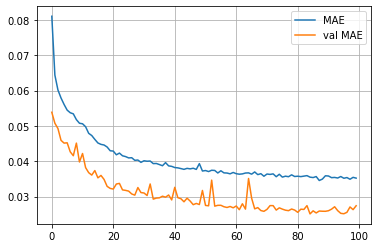

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

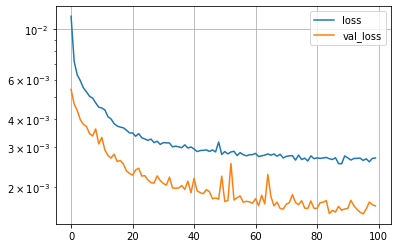

In [81]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [82]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

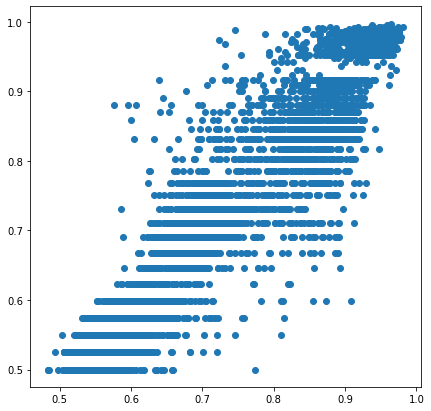

In [83]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [84]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.       , 0.9557072],
       [0.9557072, 1.       ]])

In [85]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

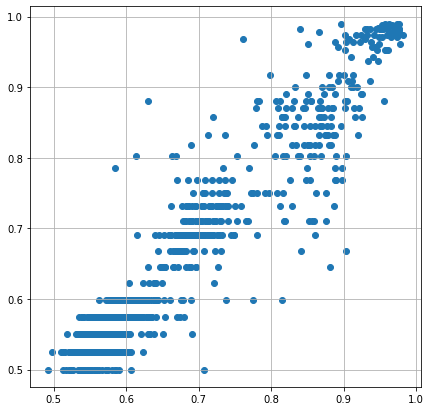

In [86]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [87]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.95291427],
       [0.95291427, 1.        ]])

## Segundo Modelo

In [88]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1],),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
#x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x1)
x = Dense(64,activation='elu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
#
x = Dense(32,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='sigmoid',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 300)          0           Input_Embedding[0][0]            
__________________________________________________________________________________________________
Capa_Densa_1 (Dense)            (None, 64)           19264       dropout_9[0][0]                  
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 64)           0           Capa_Densa_1[0][0]               
____________________________________________________________________________________________

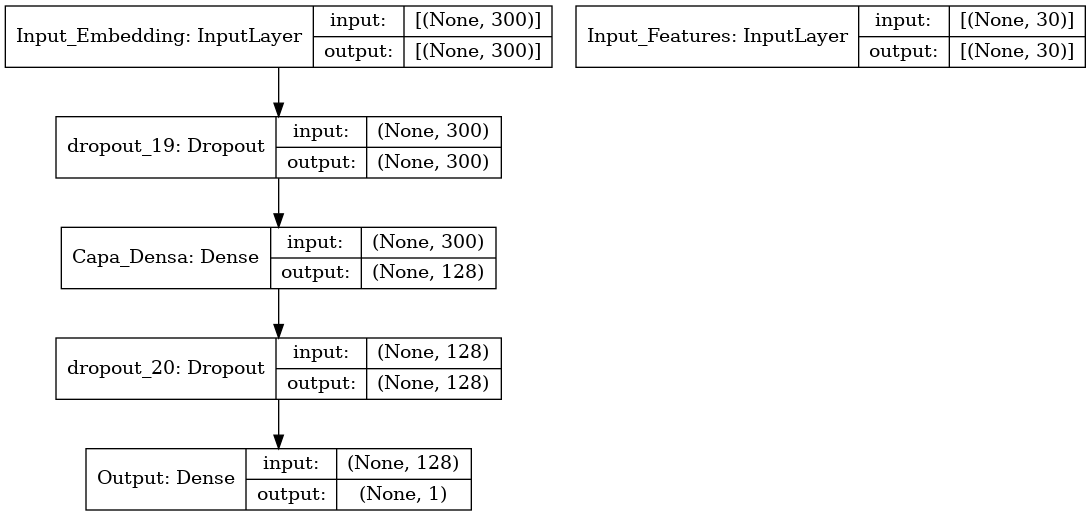

In [230]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1)

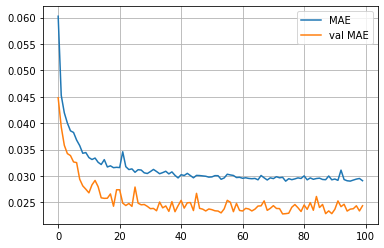

In [90]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

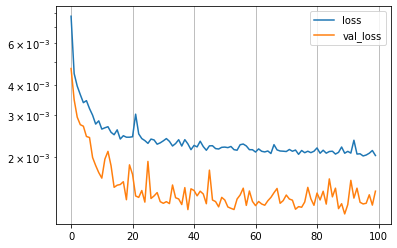

In [91]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [92]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

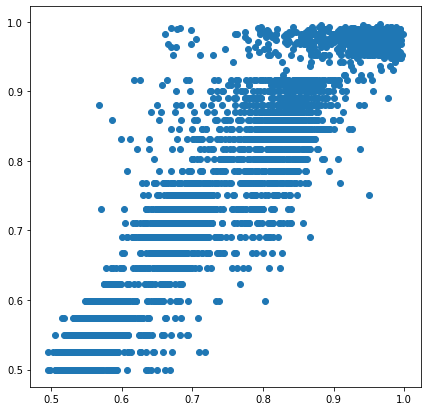

In [93]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [94]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.96030226],
       [0.96030226, 1.        ]])

In [95]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

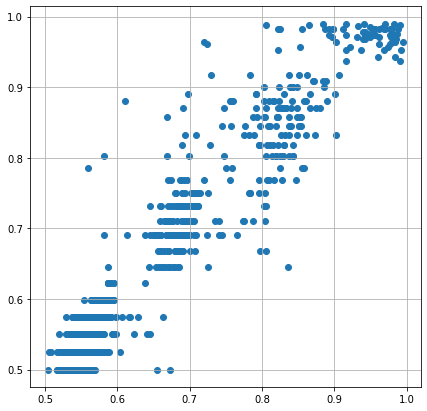

In [96]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [97]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.95777693],
       [0.95777693, 1.        ]])

## Tercer Modelo 

In [98]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1],),name='Input_Features')

x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x)
x = Dense(128,activation='relu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(32,activation='relu',name='Capa_Densa_3')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='sigmoid',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
Input_Features (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
Concatenar (Concatenate)        (None, 330)          0           Input_Embedding[0][0]            
                                                                 Input_Features[0][0]             
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 330)          0           Concatenar[0][0]           

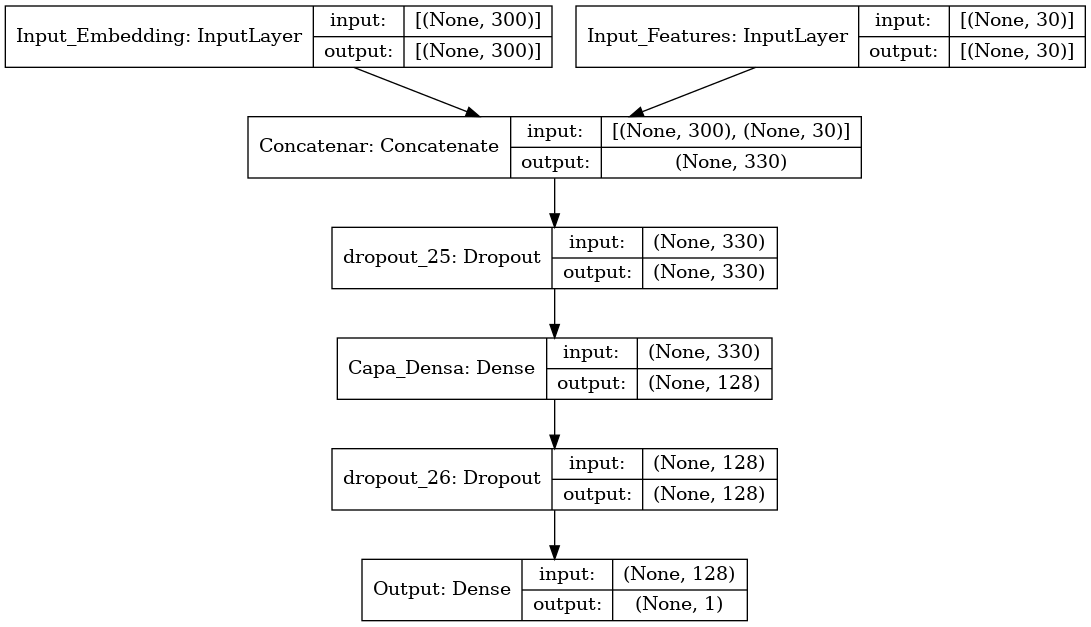

In [290]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=200,
                    batch_size=32,verbose=1)

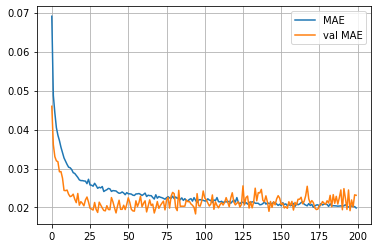

In [100]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

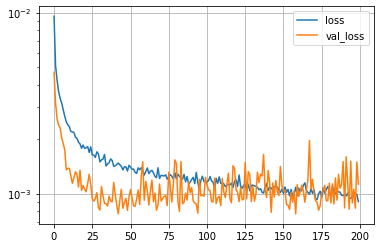

In [101]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [102]:
y_pred = model.predict([embedding_train,features_train_scaled])
y_true = target_train
y_pred.shape

(11681, 1)

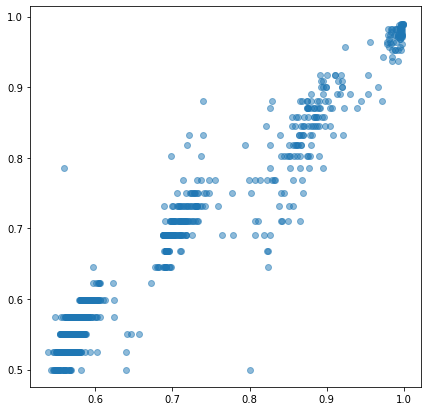

In [116]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true,alpha=0.5)
plt.show()

In [104]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.97707767],
       [0.97707767, 1.        ]])

In [105]:
y_pred = model.predict([embedding_test,features_test_scaled])
y_true = target_test
y_pred.shape

(1297, 1)

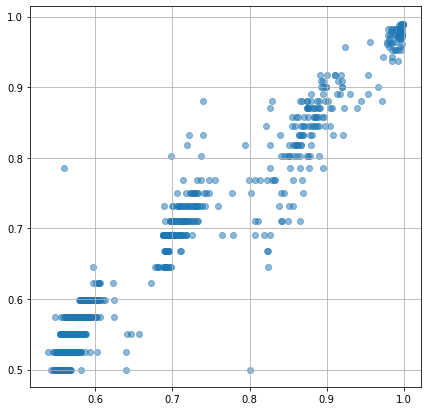

In [115]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true,alpha=0.5)
plt.grid()
plt.show()

In [107]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.97481945],
       [0.97481945, 1.        ]])

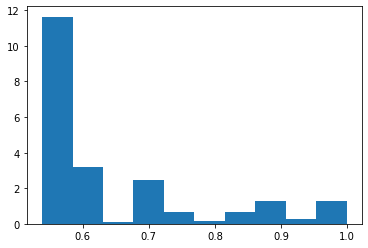

In [109]:
plt.hist(y_pred,density=True)
plt.show()